In [1]:
import pandas as pd
from dsd import flowless
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def get_node_color(label):
    colors = {
        'Neoplasms': '#D2EAF7',
        'Cardiovascular, Congenital, and Respiratory Disorders': '#BCDECF',
        'Neurological, Cognitive, and Sensory Disorders': '#FADDA6',
        'Hematologic and Immune System Disorders': '#9FA5CD',
        'Endocrine and Metabolic Disorders': '#72A3D0',
        'Gastrointestinal, Liver and Nutritional Disorders': '#F3B926',
        'Musculoskeletal and General Medical Conditions': '#62BC9B',
        'Infectious and Immunodeficiency Disorders': '#D2AEAC'
    }
    return colors.get(label, '#C0C0C0')

# Function to determine edge color based on label
def get_edge_color(label):
    edge_colors = {
        'H': '#FBAB90',
        'M': '#CECFE6',
        'L': '#B7E3B2'
    }
    return edge_colors.get(label, '#C0C0C0')

In [3]:
# Initialize the graph
G = nx.Graph()

edges_df = pd.read_csv('G:/共病/数据/community3_edges.csv')
nodes_df = pd.read_csv('G:/共病/数据/community3_nodes_with_centrality.csv')

# Add nodes with colors
for _, row in nodes_df.iterrows():
    G.add_node(row['id'], color=get_node_color(row['label']))

# Add edges with colors
for _, row in edges_df.iterrows():
    G.add_edge(row['source'], row['target'], color=get_edge_color(row['label']))

# Find cliques
cliques = list(nx.find_cliques(G))
three_cliques = [clique for clique in cliques if len(clique) == 3]
clique_graph = nx.Graph()
for i in range(len(three_cliques)):
    for j in range(i+1, len(three_cliques)):
        if set(three_cliques[i]).intersection(three_cliques[j]):
            clique_graph.add_edge(i, j)

# Using 'flowless' (assuming this function is defined elsewhere and works as expected)
k = 5
flowless_result = flowless(clique_graph, k)
dense_cliques = [three_cliques[i] for i in flowless_result[0]]
dense_subgraph_nodes = set().union(*dense_cliques)
dense_subgraph = G.subgraph(dense_subgraph_nodes)

In [4]:
# Prepare colors for nodes and edges in the subgraph
node_colors = [dense_subgraph.nodes[node]['color'] for node in dense_subgraph.nodes]
edge_colors = [dense_subgraph.edges[edge]['color'] for edge in dense_subgraph.edges]

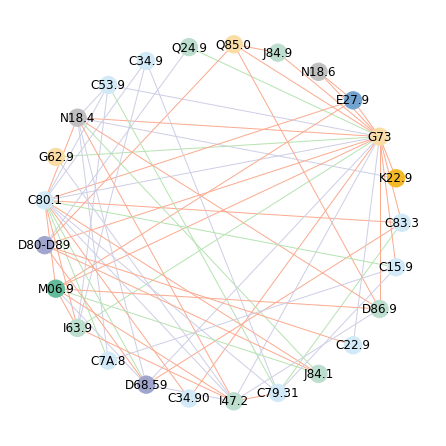

In [5]:
# Plot
plt.figure(figsize=(6, 6))
nx.draw(dense_subgraph, node_color=node_colors, edge_color=edge_colors, with_labels=True,
        pos=nx.circular_layout(dense_subgraph))
plt.savefig('G:/共病/图片/fig7_c3_dense_subgraph.png', dpi=600)